# Задача 2: Симуляція градієнтного спуску

## Завдання

### 01. Початкова точка
Оберіть випадкову початкову точку $(x_0, y_0)$ в області $[-5, 5]^2$

### 02. Ітераційний процес
Застосуйте градієнтний спуск: $x_{k+1} = x_k - \alpha \nabla f(x_k)$

Використайте $\alpha = 0.01$

### 03. Критерій зупинки
$||\nabla f(x_k)|| < 10^{-4}$ або досягнення максимальної кількості ітерацій

### 04. Аналіз результатів
Порівняйте результати для різних початкових точок. Чи досягає алгоритм глобального мінімуму?

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

## Визначення функції Растригіна та її градієнта

In [27]:
def rastrigin(x, y):
    """Функція Растригіна"""
    return 20 + x**2 + y**2 - 10 * (np.cos(2*np.pi*x) + np.cos(2*np.pi*y))

def gradient_rastrigin(x, y):
    """Градієнт функції Растригіна
    
    df/dx = 2x + 20π*sin(2πx)
    df/dy = 2y + 20π*sin(2πy)
    """
    df_dx = 2*x + 20*np.pi*np.sin(2*np.pi*x)
    df_dy = 2*y + 20*np.pi*np.sin(2*np.pi*y)
    return np.array([df_dx, df_dy])

## Реалізація градієнтного спуску

In [28]:
def gradient_descent(x0, y0, alpha=0.01, max_iter=10000, tolerance=1e-4):
    """
    Градієнтний спуск для функції Растригіна
    
    Параметри:
    - x0, y0: початкова точка
    - alpha: швидкість навчання (learning rate)
    - max_iter: максимальна кількість ітерацій
    - tolerance: критерій зупинки для норми градієнта
    
    Повертає:
    - history: історія точок (x, y, f(x,y), ||∇f||)
    - converged: чи збігся алгоритм
    """
    
    x, y = x0, y0
    history = []
    
    for iteration in range(max_iter):
        # Обчислюємо градієнт
        grad = gradient_rastrigin(x, y)
        grad_norm = np.linalg.norm(grad)
        
        # Зберігаємо історію
        f_val = rastrigin(x, y)
        history.append([x, y, f_val, grad_norm])
        
        # Перевіряємо критерій зупинки
        if grad_norm < tolerance:
            print(f"Збіжність досягнута на ітерації {iteration}")
            return np.array(history), True
        
        # Оновлюємо позицію: x_{k+1} = x_k - alpha * ∇f(x_k)
        x = x - alpha * grad[0]
        y = y - alpha * grad[1]
    
    print(f"Досягнуто максимальну кількість ітерацій ({max_iter})")
    return np.array(history), False

print("Функція градієнтного спуску готова до використання")

Функція градієнтного спуску готова до використання


## Експеримент 1: Випадкові початкові точки

In [29]:
# Задаємо seed для відтворюваності результатів
np.random.seed(42)

# Генеруємо кілька випадкових початкових точок
n_experiments = 5
initial_points = []
results = []

print("Виконуємо градієнтний спуск з різних початкових точок:\n")
print(f"Швидкість навчання α = 0.01")
print(f"Критерій зупинки: ||∇f|| < 1e-4\n")
print("=" * 80)

for i in range(n_experiments):
    # Генеруємо випадкову початкову точку
    x0 = np.random.uniform(-5, 5)
    y0 = np.random.uniform(-5, 5)
    initial_points.append([x0, y0])
    
    print(f"\nЕкспериметр {i+1}:")
    print(f"Початкова точка: ({x0:.4f}, {y0:.4f}), f(x0, y0) = {rastrigin(x0, y0):.4f}")
    
    # Виконуємо градієнтний спуск
    history, converged = gradient_descent(x0, y0, alpha=0.01)
    results.append(history)
    
    # Виводимо результати
    final_x, final_y, final_f, final_grad_norm = history[-1]
    print(f"Кінцева точка: ({final_x:.6f}, {final_y:.6f})")
    print(f"f(x*, y*) = {final_f:.6f}")
    print(f"||∇f(x*, y*)|| = {final_grad_norm:.6e}")
    print(f"Кількість ітерацій: {len(history)}")
    print(f"Статус: {'Збіглося' if converged else 'Не збіглося'}")
    
    # Перевіряємо, чи це глобальний мінімум
    if np.allclose([final_x, final_y], [0, 0], atol=0.1):
        print("✓ Досягнуто глобального мінімуму!")
    else:
        print("✗ Застряг в локальному мінімумі")

# Додатковий експеримент з точкою біля глобального мінімуму
print(f"\nЕкспериметр {n_experiments + 1} (спеціальна точка):")
x0, y0 = 0.0001, 0.0001
initial_points.append([x0, y0])
print(f"Початкова точка: ({x0:.4f}, {y0:.4f}), f(x0, y0) = {rastrigin(x0, y0):.4f}")

# Виконуємо градієнтний спуск
history, converged = gradient_descent(x0, y0, alpha=0.01)
results.append(history)

# Виводимо результати
final_x, final_y, final_f, final_grad_norm = history[-1]
print(f"Кінцева точка: ({final_x:.6f}, {final_y:.6f})")
print(f"f(x*, y*) = {final_f:.6f}")
print(f"||∇f(x*, y*)|| = {final_grad_norm:.6e}")
print(f"Кількість ітерацій: {len(history)}")
print(f"Статус: {'Збіглося' if converged else 'Не збіглося'}")

# Перевіряємо, чи це глобальний мінімум
if np.allclose([final_x, final_y], [0, 0], atol=0.1):
    print("Досягнуто глобального мінімуму!")
else:
    print("Застряг в локальному мінімумі")

print("\n" + "=" * 80)

Виконуємо градієнтний спуск з різних початкових точок:

Швидкість навчання α = 0.01
Критерій зупинки: ||∇f|| < 1e-4


Експериметр 1:
Початкова точка: (-1.2546, 4.5071), f(x0, y0) = 52.1672
Досягнуто максимальну кількість ітерацій (10000)
Кінцева точка: (-0.588033, 2.539296)
f(x*, y*) = 44.999384
||∇f(x*, y*)|| = 3.345092e+01
Кількість ітерацій: 10000
Статус: Не збіглося
✗ Застряг в локальному мінімумі

Експериметр 2:
Початкова точка: (2.3199, 0.9866), f(x0, y0) = 20.6453
Досягнуто максимальну кількість ітерацій (10000)
Кінцева точка: (2.362701, 0.581312)
f(x*, y*) = 41.147403
||∇f(x*, y*)|| = 6.020755e+01
Кількість ітерацій: 10000
Статус: Не збіглося
✗ Застряг в локальному мінімумі

Експериметр 3:
Початкова точка: (-3.4398, -3.4401), f(x0, y0) = 62.2588
Досягнуто максимальну кількість ітерацій (10000)
Досягнуто максимальну кількість ітерацій (10000)
Кінцева точка: (2.362701, 0.581312)
f(x*, y*) = 41.147403
||∇f(x*, y*)|| = 6.020755e+01
Кількість ітерацій: 10000
Статус: Не збіглося
✗ За

## Візуалізація траєкторій градієнтного спуску

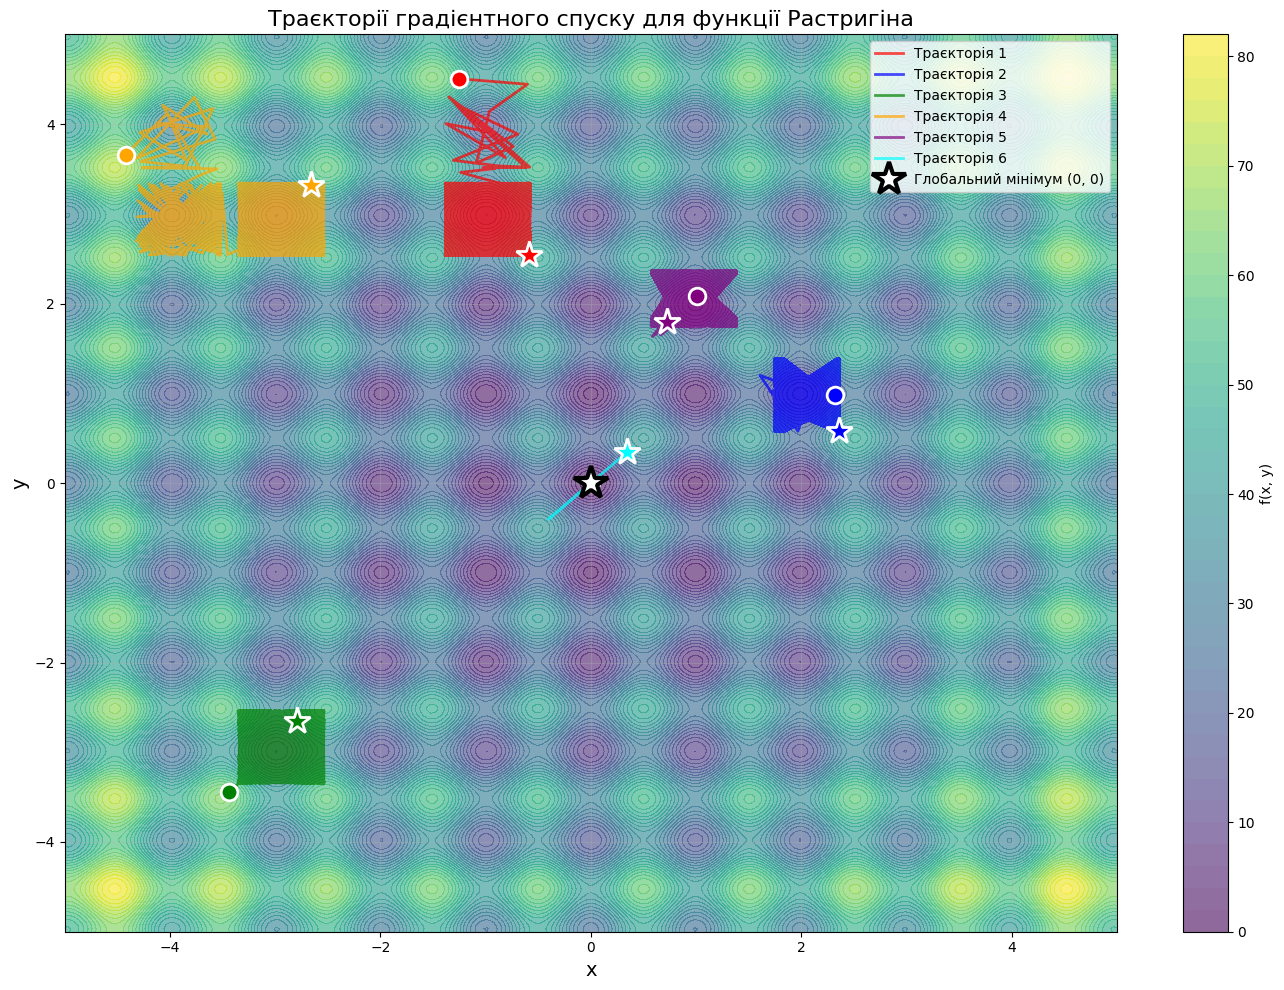

In [30]:
# Створюємо сітку для візуалізації функції
x = np.linspace(-5, 5, 300)
y = np.linspace(-5, 5, 300)
X, Y = np.meshgrid(x, y)
Z = rastrigin(X, Y)

# Візуалізація всіх траєкторій
plt.figure(figsize=(14, 10))

# Контурний графік
contour = plt.contourf(X, Y, Z, levels=40, cmap='viridis', alpha=0.6)
plt.colorbar(contour, label='f(x, y)')

colors = ['red', 'blue', 'green', 'orange', 'purple', 'cyan']

# Малюємо траєкторії
for i, (history, color) in enumerate(zip(results, colors)):
    trajectory = history[:, :2]  # Береми тільки координати x, y
    
    # Малюємо траєкторію
    plt.plot(trajectory[:, 0], trajectory[:, 1], color=color, 
            linewidth=2, alpha=0.7, label=f'Траєкторія {i+1}')
    
    # Початкова точка
    plt.plot(trajectory[0, 0], trajectory[0, 1], 'o', color=color, 
            markersize=12, markeredgecolor='white', markeredgewidth=2)
    
    # Кінцева точка
    plt.plot(trajectory[-1, 0], trajectory[-1, 1], '*', color=color, 
            markersize=20, markeredgecolor='white', markeredgewidth=2)

# Відмічаємо глобальний мінімум
plt.plot(0, 0, 'w*', markersize=25, markeredgecolor='black', 
        markeredgewidth=3, label='Глобальний мінімум (0, 0)', zorder=10)

plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.title('Траєкторії градієнтного спуску для функції Растригіна', fontsize=16)
plt.legend(loc='upper right', fontsize=10)
plt.grid(True, alpha=0.3)
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.tight_layout()
plt.show()

## Аналіз збіжності: Графіки значення функції та норми градієнта

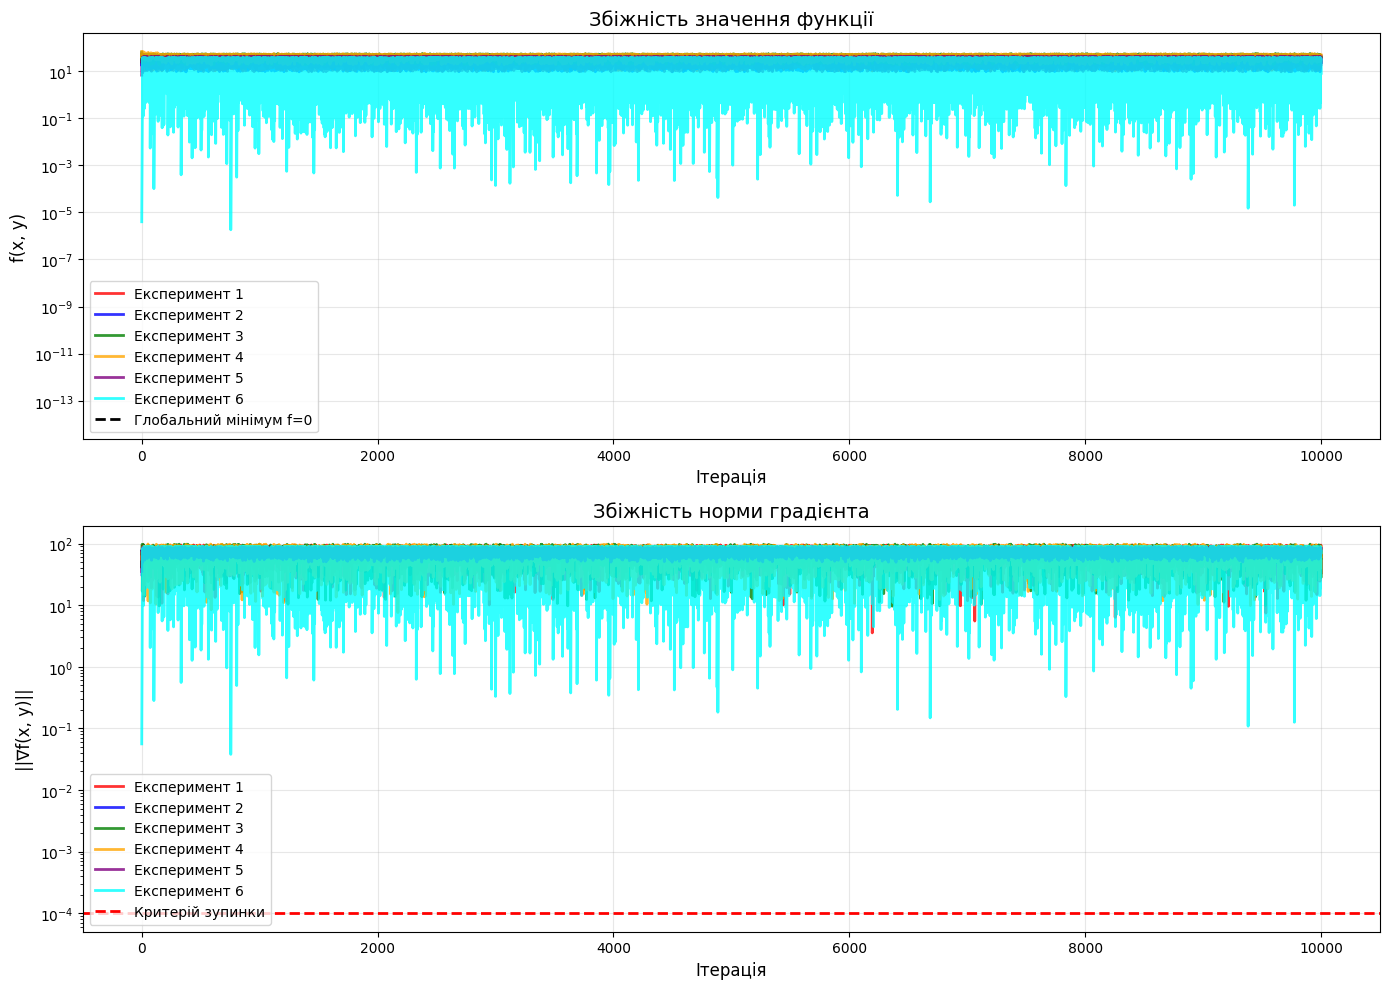

In [31]:
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Графік значення функції
for i, (history, color) in enumerate(zip(results, colors)):
    iterations = np.arange(len(history))
    function_values = history[:, 2]
    axes[0].plot(iterations, function_values, color=color, linewidth=2, 
                label=f'Експеримент {i+1}', alpha=0.8)

axes[0].axhline(y=0, color='black', linestyle='--', linewidth=2, 
               label='Глобальний мінімум f=0')
axes[0].set_xlabel('Ітерація', fontsize=12)
axes[0].set_ylabel('f(x, y)', fontsize=12)
axes[0].set_title('Збіжність значення функції', fontsize=14)
axes[0].legend(fontsize=10)
axes[0].grid(True, alpha=0.3)
axes[0].set_yscale('log')

# Графік норми градієнта
for i, (history, color) in enumerate(zip(results, colors)):
    iterations = np.arange(len(history))
    grad_norms = history[:, 3]
    axes[1].plot(iterations, grad_norms, color=color, linewidth=2, 
                label=f'Експеримент {i+1}', alpha=0.8)


axes[1].axhline(y=1e-4, color='red', linestyle='--', linewidth=2, 
               label='Критерій зупинки')
axes[1].set_xlabel('Ітерація', fontsize=12)
axes[1].set_ylabel('||∇f(x, y)||', fontsize=12)
axes[1].set_title('Збіжність норми градієнта', fontsize=14)
axes[1].legend(fontsize=10)
axes[1].grid(True, alpha=0.3)
axes[1].set_yscale('log')

plt.tight_layout()
plt.show()

## Експеримент 2: Різні швидкості навчання

In [32]:
# Тестуємо різні значення alpha
alphas = [0.001, 0.005, 0.01, 0.02, 0.05]
x0, y0 = 3.5, 3.5  # Фіксована початкова точка

print(f"Тестування різних швидкостей навчання з початкової точки ({x0}, {y0})\n")
print("=" * 80)

alpha_results = []
for alpha in alphas:
    print(f"\nα = {alpha}:")
    history, converged = gradient_descent(x0, y0, alpha=alpha, max_iter=10000)
    alpha_results.append((alpha, history))
    
    final_x, final_y, final_f, final_grad_norm = history[-1]
    print(f"  Кінцева точка: ({final_x:.6f}, {final_y:.6f})")
    print(f"  f(x*, y*) = {final_f:.6f}")
    print(f"  Ітерацій: {len(history)}")
    print(f"  Статус: {'Збіглося' if converged else 'Не збіглося'}")

Тестування різних швидкостей навчання з початкової точки (3.5, 3.5)


α = 0.001:
Збіжність досягнута на ітерації 38
  Кінцева точка: (2.984856, 2.984856)
  f(x*, y*) = 17.909202
  Ітерацій: 39
  Статус: Збіглося

α = 0.005:
Збіжність досягнута на ітерації 489
  Кінцева точка: (2.984856, 2.984856)
  f(x*, y*) = 17.909202
  Ітерацій: 490
  Статус: Збіглося

α = 0.01:
Досягнуто максимальну кількість ітерацій (10000)
  Кінцева точка: (2.743953, 2.743953)
  f(x*, y*) = 35.818276
  Ітерацій: 10000
  Статус: Не збіглося

α = 0.02:
Досягнуто максимальну кількість ітерацій (10000)
  Кінцева точка: (-6.530654, -6.530654)
  f(x*, y*) = 124.929063
  Ітерацій: 10000
  Статус: Не збіглося

α = 0.05:
Досягнуто максимальну кількість ітерацій (10000)
  Кінцева точка: (-6.469974, -6.469974)
  f(x*, y*) = 123.366247
  Ітерацій: 10000
  Статус: Не збіглося
Досягнуто максимальну кількість ітерацій (10000)
  Кінцева точка: (-6.530654, -6.530654)
  f(x*, y*) = 124.929063
  Ітерацій: 10000
  Статус: Не збігло

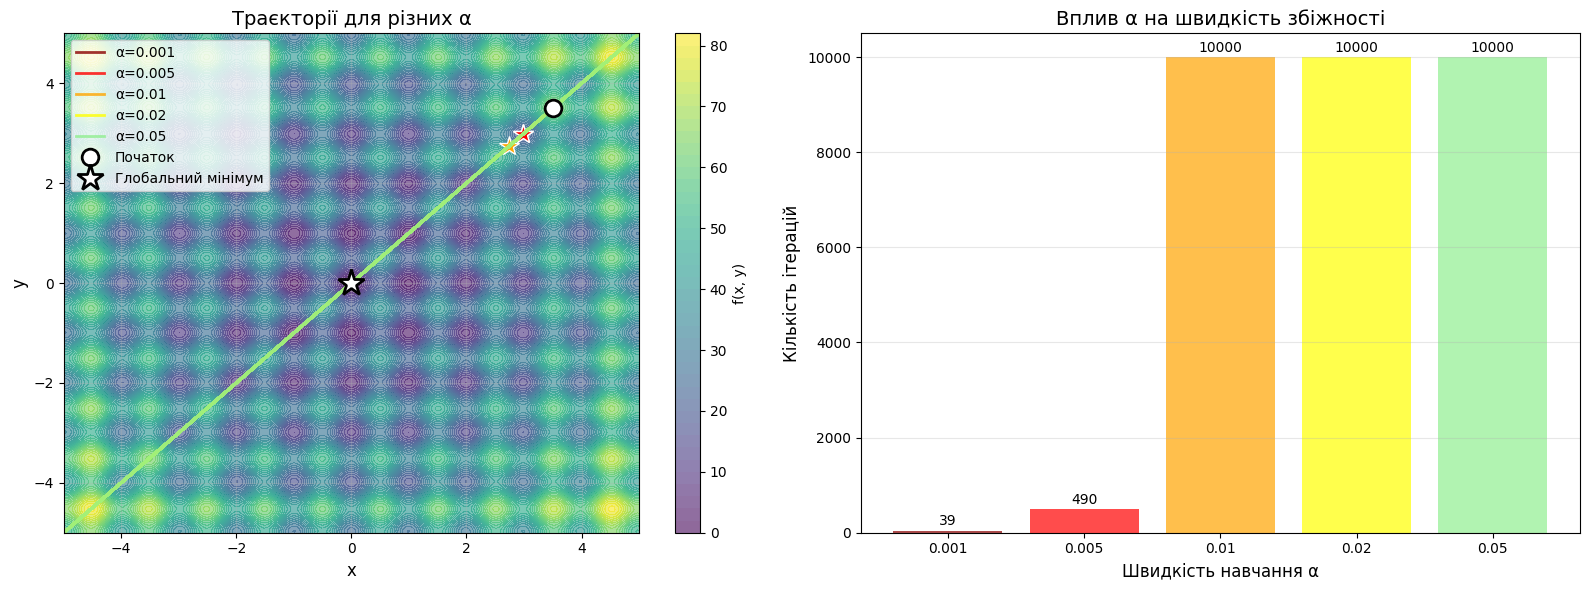

In [33]:
# Візуалізація впливу швидкості навчання
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Контурний графік з траєкторіями
contour = axes[0].contourf(X, Y, Z, levels=40, cmap='viridis', alpha=0.6)
plt.colorbar(contour, ax=axes[0], label='f(x, y)')

colors_alpha = ['darkred', 'red', 'orange', 'yellow', 'lightgreen']
for (alpha, history), color in zip(alpha_results, colors_alpha):
    trajectory = history[:, :2]
    axes[0].plot(trajectory[:, 0], trajectory[:, 1], color=color, 
                linewidth=2, alpha=0.8, label=f'α={alpha}')
    axes[0].plot(trajectory[-1, 0], trajectory[-1, 1], '*', color=color, 
                markersize=15, markeredgecolor='white', markeredgewidth=1)

axes[0].plot(x0, y0, 'wo', markersize=12, markeredgecolor='black', 
            markeredgewidth=2, label='Початок', zorder=10)
axes[0].plot(0, 0, 'w*', markersize=20, markeredgecolor='black', 
            markeredgewidth=2, label='Глобальний мінімум', zorder=10)
axes[0].set_xlabel('x', fontsize=12)
axes[0].set_ylabel('y', fontsize=12)
axes[0].set_title('Траєкторії для різних α', fontsize=14)
axes[0].legend(fontsize=10)
axes[0].grid(True, alpha=0.3)
axes[0].set_xlim(-5, 5)
axes[0].set_ylim(-5, 5)

# Графік кількості ітерацій
num_iterations = [len(history) for alpha, history in alpha_results]
axes[1].bar(range(len(alphas)), num_iterations, color=colors_alpha, alpha=0.7)
axes[1].set_xticks(range(len(alphas)))
axes[1].set_xticklabels([f'{alpha}' for alpha in alphas])
axes[1].set_xlabel('Швидкість навчання α', fontsize=12)
axes[1].set_ylabel('Кількість ітерацій', fontsize=12)
axes[1].set_title('Вплив α на швидкість збіжності', fontsize=14)
axes[1].grid(True, alpha=0.3, axis='y')

# Додаємо значення над стовпцями
for i, v in enumerate(num_iterations):
    axes[1].text(i, v + 50, str(v), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

## Висновки

### Що показують траєкторії (лівий графік)
- Із фіксованої початкової точки (≈3.5, 3.5) усі траєкторії рухаються діагоналлю та зупиняються в локальному мінімумі, не досягаючи (0, 0).
- Це підкреслює сильну залежність градієнтного спуску від старту на «ребристій» функції Растригіна: градієнт веде у найближчу «ямку» (басейн притягання), а не в глобальний мінімум.
- Спеціальний старт поблизу (0, 0) (0.0001, 0.0001) збігається до глобального мінімуму швидко — метод працює надійно в околі мінімуму.

### Вплив швидкості навчання α (правий графік)
- α = 0.001: стабільна збіжність ≈ за 39 ітерацій (повільно, але надійно).
- α = 0.005: збіжність ≈ за 490 ітерацій.
- α ∈ {0.01, 0.02, 0.05}: досягнуто ліміт 10 000 ітерацій без досягнення порогу ||∇f|| < 1e−4 (типово через коливання/«блукання» в періодичному ландшафті).
- Висновок по α: надто великий крок на цій функції часто зривáє збіжність; малий крок збігається стабільно, але повільно.

### Аналіз збіжності (f та ||∇f||)
- Коли траєкторія прямує до мінімуму, f(x, y) монотонно спадає, а ||∇f|| падає нижче 1e−4.
- Для стартів, що потрапляють у локальні мінімуми, f стабілізується > 0; ||∇f|| також може впасти нижче порогу — це локальна, а не глобальна оптимальність.

Підсумок: у даному експерименті старт із (≈3.5, 3.5) приводить до локальних мінімумів; α=0.001 і 0.005 збігаються (39 та 490 ітерацій відповідно), а більші α не досягають порогу до 10 000 ітерацій. Старт поблизу (0, 0) підтверджує локальну ефективність методу в околі глобального мінімуму.